# Supervised Learning

In [1]:
library(e1071)

## Support Vector Classifier

### Creating Training Data

x.1,x.2,y
-0.6264538,0.91897737,-1
0.1836433,0.78213630,-1
-0.8356286,0.07456498,-1
1.5952808,-1.98935170,-1
0.3295078,0.61982575,-1
-0.8204684,-0.05612874,-1
0.4874291,-0.15579551,-1
0.7383247,-1.47075238,-1
0.5757814,-0.47815006,-1
-0.3053884,0.41794156,-1


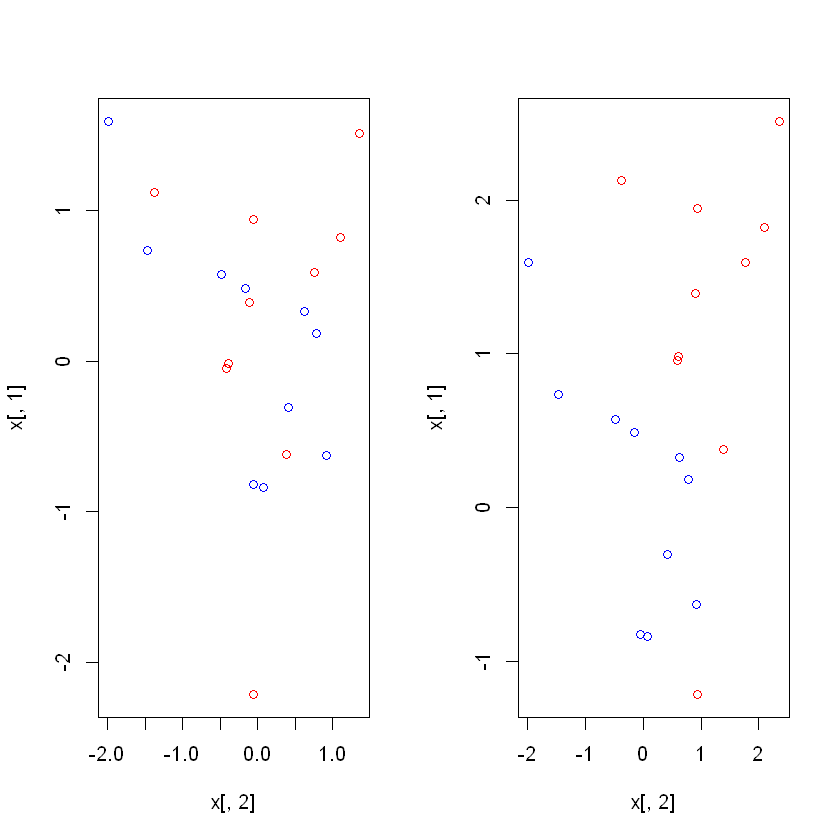

In [2]:
par(mfrow=c(1,2))
set.seed(1)
x=matrix(rnorm(20*2), ncol=2)
y=c(rep(-1,10), rep(1,10)) # y column having first 10 elements -1 ; next 10 elements 1
plot(x[,2],x[,1],col=(3-y)) # col will decide the color of pts.
#x

x[y==1,]=x[y==1,]+1
plot(x[,2],x[,1],col=(3-y))
dat = data.frame(x=x,y=as.factor(y))
dat

## Model 1

[1]  1  2  5  7 14 16 17


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




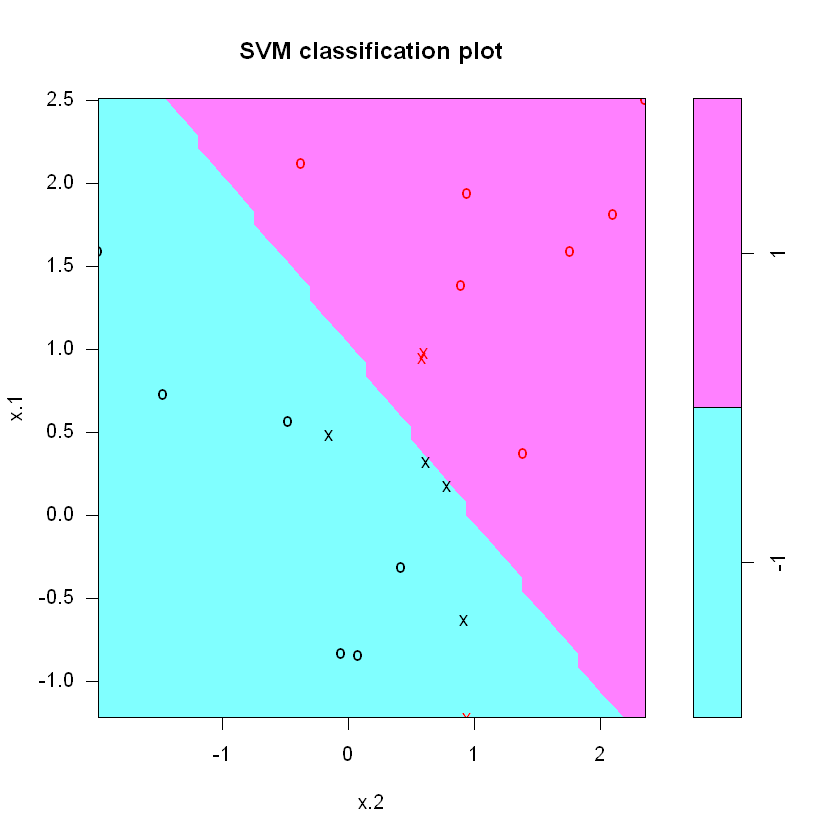

In [3]:
svmfit1=svm(y~., data=dat, kernel = "linear", cost =10, scale = FALSE) # cost = 10
plot(svmfit1, dat)
# cross represents the support vectors

svmfit1$index # identifies the support vectors
summary(svmfit1)
# gamma = 1/(number of X values) ; here 1/2 ; gamma is important in radial kernal

## Model 2


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




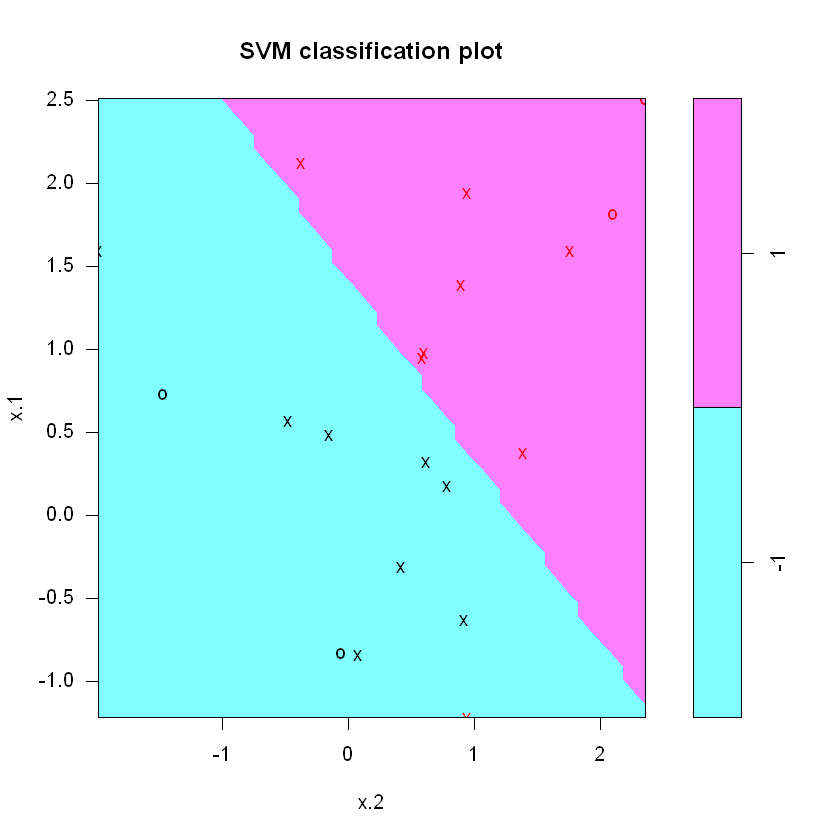

In [4]:
svmfit2=svm(y~., data=dat, kernel = "linear", cost =0.1, scale = FALSE) # cost = 0.1
plot(svmfit2, dat)
# cross represents the support vectors ; margin is increased
# low cost results in large margins and 16 support points
summary(svmfit2)

## Tunning Model with diffrent costs

In [5]:
set.seed(1)
tune.out = tune(svm, y~., data=dat, kernal="linear", ranges=list(cost=c(0.001,0.01,0.1,1,5,10,100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.65  0.4743416
2 1e-02  0.65  0.4743416
3 1e-01  0.65  0.4743416
4 1e+00  0.15  0.2415229
5 5e+00  0.10  0.2108185
6 1e+01  0.10  0.2108185
7 1e+02  0.10  0.2108185


In [6]:
# best model is corrosponding to cost
# best performance is error of the model
bestmod = tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernal = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  5 
      gamma:  0.5 

Number of Support Vectors:  9

 ( 5 4 )


Number of Classes:  2 

Levels: 
 -1 1




## Creating Test Data

       truth
predict -1 1
     -1  8 0
     1   3 9

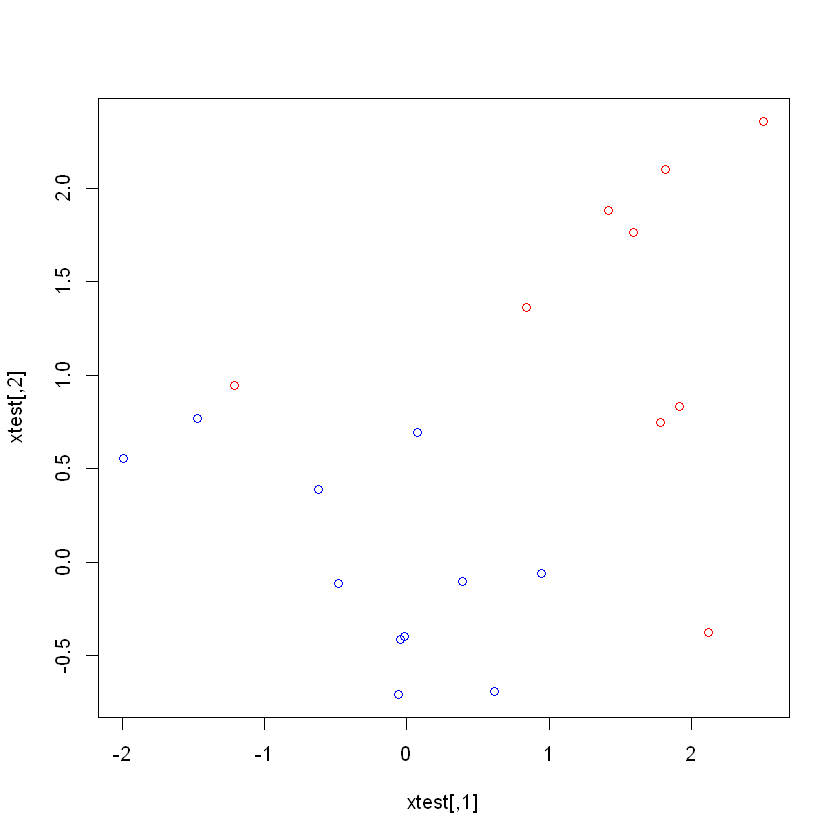

In [7]:
xtest = matrix(rnorm(20*2), ncol=2)
ytest = sample(c(-1,1),20,rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,]+1
testdat=data.frame(x=xtest, y=as.factor(ytest))
plot(xtest, col = (3-ytest))
# predict class lable of the test observation using best model
ypred=predict(bestmod, testdat)
table(predict=ypred, truth=testdat$y)

## Model 3

In [8]:
# cost =0.01, no of support vector should increase
svmfit3=svm(y~., data=dat, kernel = "linear", cost =0.01, scale = FALSE) # cost = 0.01
ypred = predict(svmfit3, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  2
     1   0  7

## Model 4

       truth
predict -1  1
     -1 11  1
     1   0  8

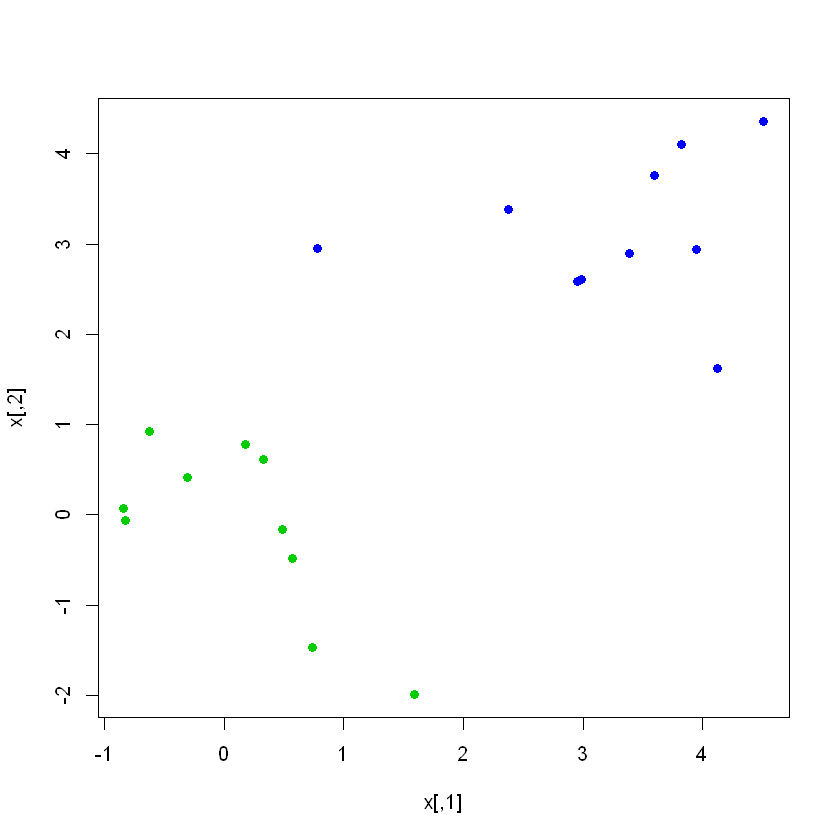

In [9]:
# two classes linearly separable
x[y==1,]=x[y==1,]+2
plot(x, col = (y+5)/2+1, pch=19)
par(mfrow = c(1,1))

svmfit4=svm(y~., data=dat, kernel = "linear", cost =0.1, scale = FALSE) # cost = 0.1
ypred = predict(svmfit4, testdat)
table(predict=ypred, truth=testdat$y)

## Model 5


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




[1]  2 14 15

       truth
predict -1  1
     -1 11  5
     1   0  4

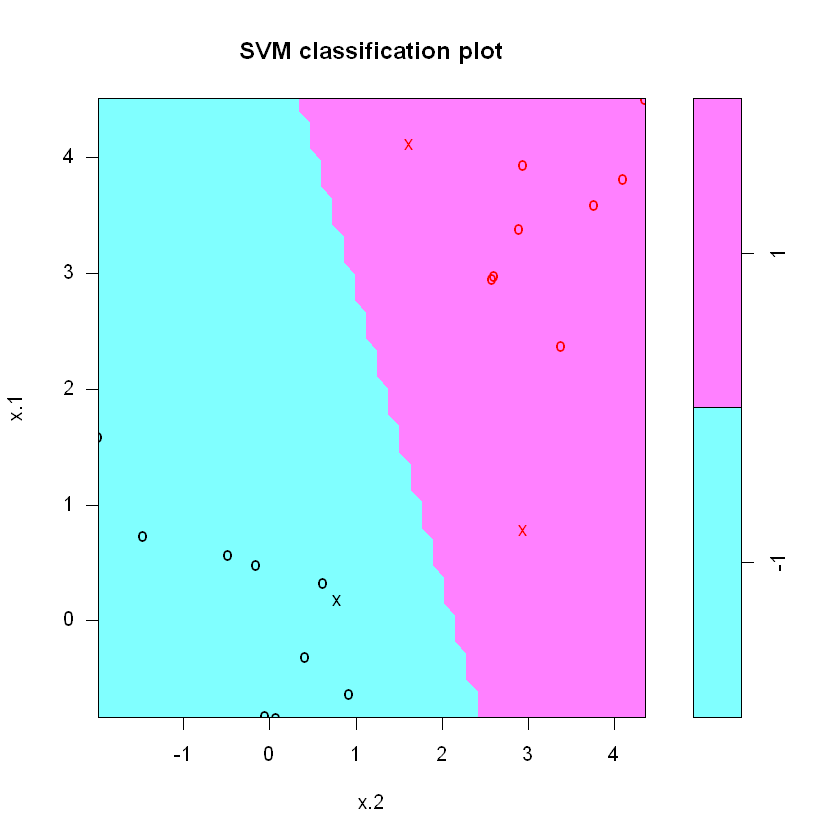

In [10]:
# fit svm with high cost so that no observation is missclassified
dat = data.frame(x=x, y=as.factor(y))
svmfit5=svm(y~.,data=dat, kernel = "linear", cost = 1e5)
summary(svmfit5)
plot(svmfit5, dat)
svmfit5$index

ypred=predict(svmfit5,testdat)
table(predict=ypred, truth=testdat$y)

## Model 6


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  4

 ( 2 2 )


Number of Classes:  2 

Levels: 
 -1 1




[1]  2  5 14 15

       truth
predict -1  1
     -1 11  5
     1   0  4

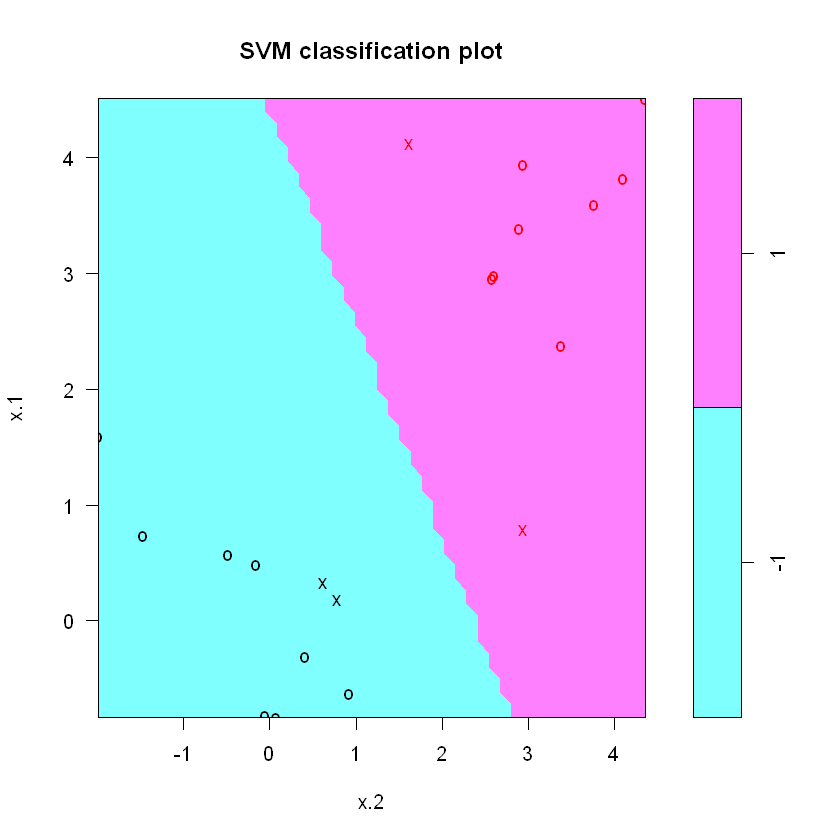

In [11]:
svmfit6=svm(y~.,data=dat, kernel = "linear", cost = 1)
summary(svmfit6)
plot(svmfit6,dat)
svmfit6$index

ypred=predict(svmfit6,testdat)
table(predict=ypred, truth=testdat$y)

## Support Vector Machine

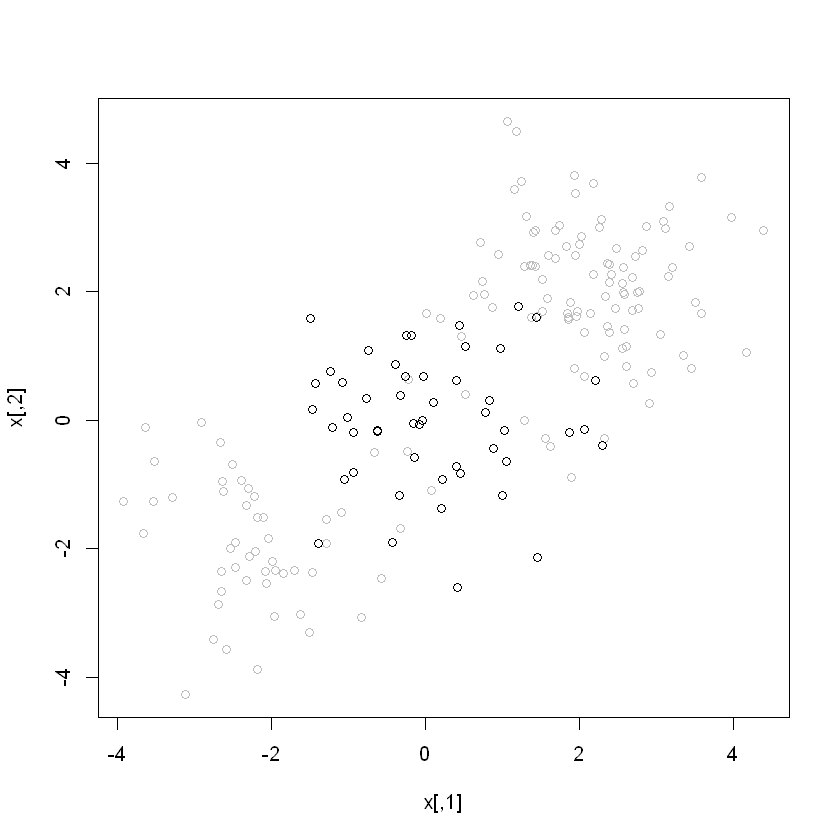

In [12]:
set.seed(1)
x=matrix(rnorm(200*2), ncol=2)
x[1:100,]=x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(1,150),rep(2,50))
dat=data.frame(x=x, y=as.factor(y))
plot(x, col=y+7)

## Model 7

[1] 100


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  37

 ( 17 20 )


Number of Classes:  2 

Levels: 
 1 2




   
     1  2
  1 67  5
  2  6 22

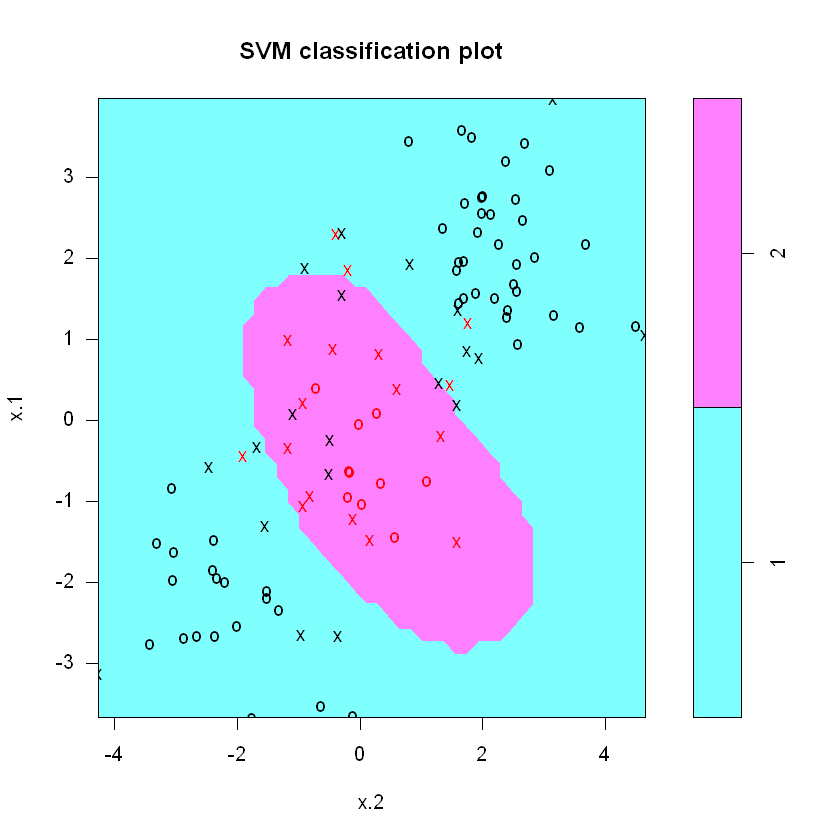

In [13]:
train=sample(200,100)
length(train)
svmfit7 = svm(y~.,data=dat[train,],kernel = "radial", gamma = 1, cost = 1)

plot(svmfit7,dat[train,])
summary(svmfit7)
table(svmfit7$fitted, y[train])

## Model 8


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "polynomial", 
    degree = 2, cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
      gamma:  0.5 
     coef.0:  0 

Number of Support Vectors:  47

 ( 23 24 )


Number of Classes:  2 

Levels: 
 1 2




   
     1  2
  1 62  5
  2 11 22

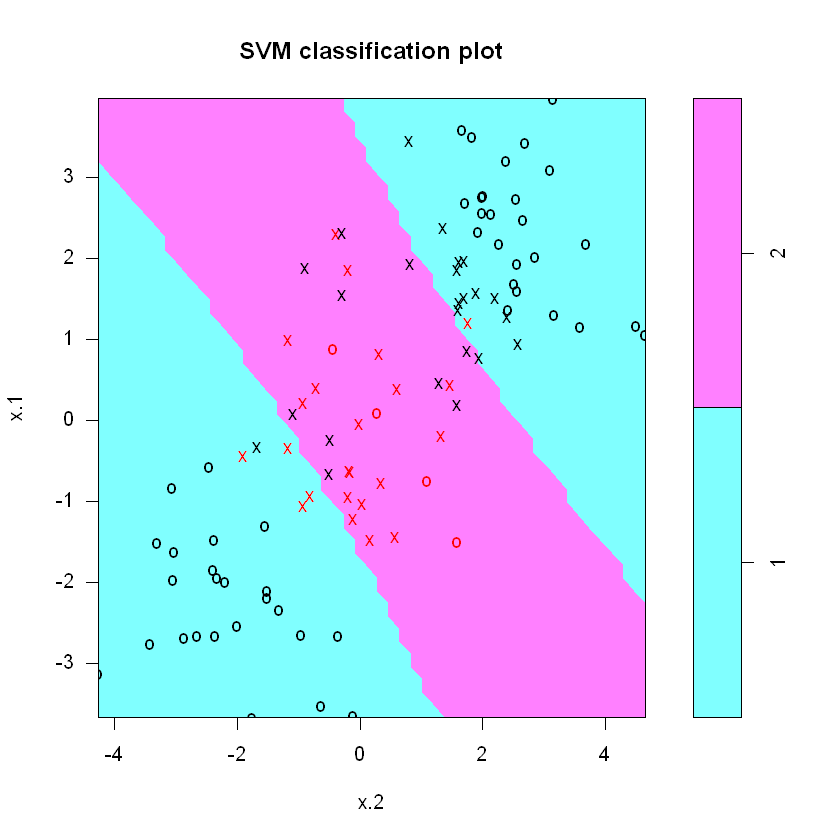

In [14]:
svmfit8 = svm(y~.,data=dat[train,],kernel = "polynomial", degree = 2, cost = 1)

plot(svmfit8,dat[train,])
summary(svmfit8)
table(svmfit8$fitted, y[train])

## Model 9


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1e+05 
      gamma:  1 

Number of Support Vectors:  26

 ( 12 14 )


Number of Classes:  2 

Levels: 
 1 2




   
     1  2
  1 73  1
  2  0 26

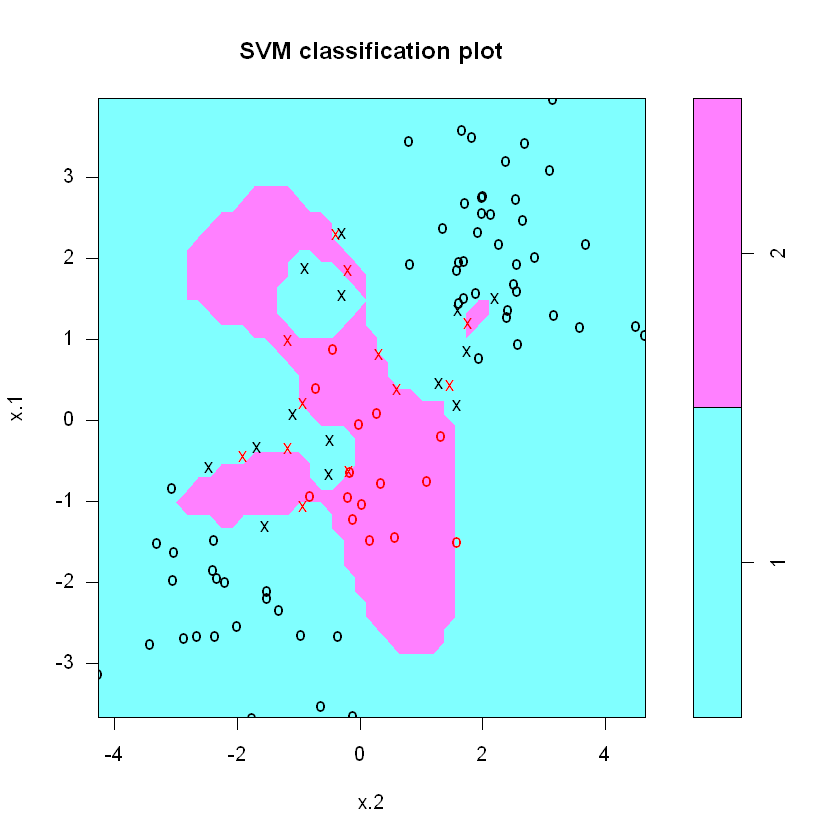

In [15]:
svmfit9 = svm(y~.,data=dat[train,],kernel = "radial", gamma = 1, cost = 1e5)
plot(svmfit9,dat[train,])
summary(svmfit9)
table(svmfit9$fitted, y[train])

## Model 10


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "polynomial", 
    degree = 2, cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1e+05 
     degree:  2 
      gamma:  0.5 
     coef.0:  0 

Number of Support Vectors:  34

 ( 17 17 )


Number of Classes:  2 

Levels: 
 1 2




   
     1  2
  1 63  5
  2 10 22

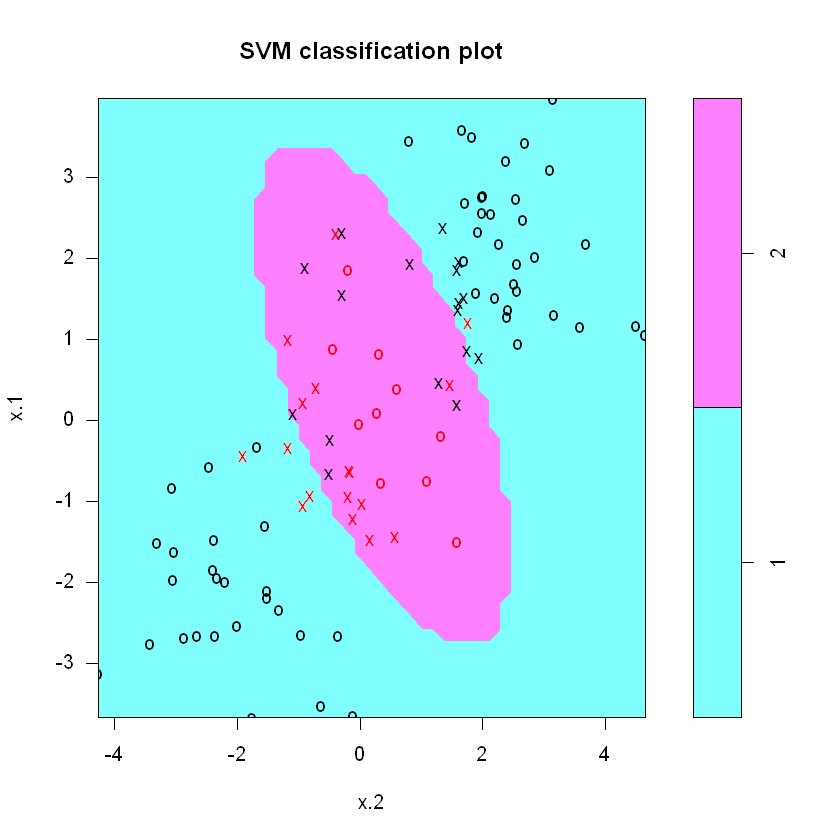

In [16]:
svmfit10 = svm(y~.,data=dat[train,],kernel = "polynomial", degree = 2, cost = 1e5)
plot(svmfit10,dat[train,])
summary(svmfit10)
table(svmfit10$fitted, y[train])

## Predict test data using best model and compare

In [17]:
tune.out = tune(svm, y~., data=dat[train,], kernel="radial", ranges=list(cost=c(0.1,1,10,100,1000), gamma=c(0.5,1,2,3,4)))
summary(tune.out)

# predict test data using best model and compare
table(true=dat[-train,"y"], pred=predict(tune.out$best.model, newx=dat[-train,]))


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.13 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.28 0.16865481
2  1e+00   0.5  0.13 0.10593499
3  1e+01   0.5  0.14 0.11737878
4  1e+02   0.5  0.18 0.10327956
5  1e+03   0.5  0.19 0.11005049
6  1e-01   1.0  0.30 0.15634719
7  1e+00   1.0  0.14 0.11737878
8  1e+01   1.0  0.18 0.10327956
9  1e+02   1.0  0.19 0.13703203
10 1e+03   1.0  0.22 0.11352924
11 1e-01   2.0  0.29 0.15951315
12 1e+00   2.0  0.15 0.11785113
13 1e+01   2.0  0.17 0.11595018
14 1e+02   2.0  0.19 0.11005049
15 1e+03   2.0  0.24 0.13498971
16 1e-01   3.0  0.29 0.15951315
17 1e+00   3.0  0.15 0.09718253
18 1e+01   3.0  0.17 0.11595018
19 1e+02   3.0  0.22 0.12292726
20 1e+03   3.0  0.25 0.12692955
21 1e-01   4.0  0.27 0.18287822
22 1e+00   4.0  0.16 0.09660918
23 1e+01   4.0  0.21 0.11972190
24 1e+02   4.0  0.21 0.07378648
25 1e+03   4.0  0.25 0

    pred
true  1  2
   1 54 23
   2 17  6

## SVM with multiple classes

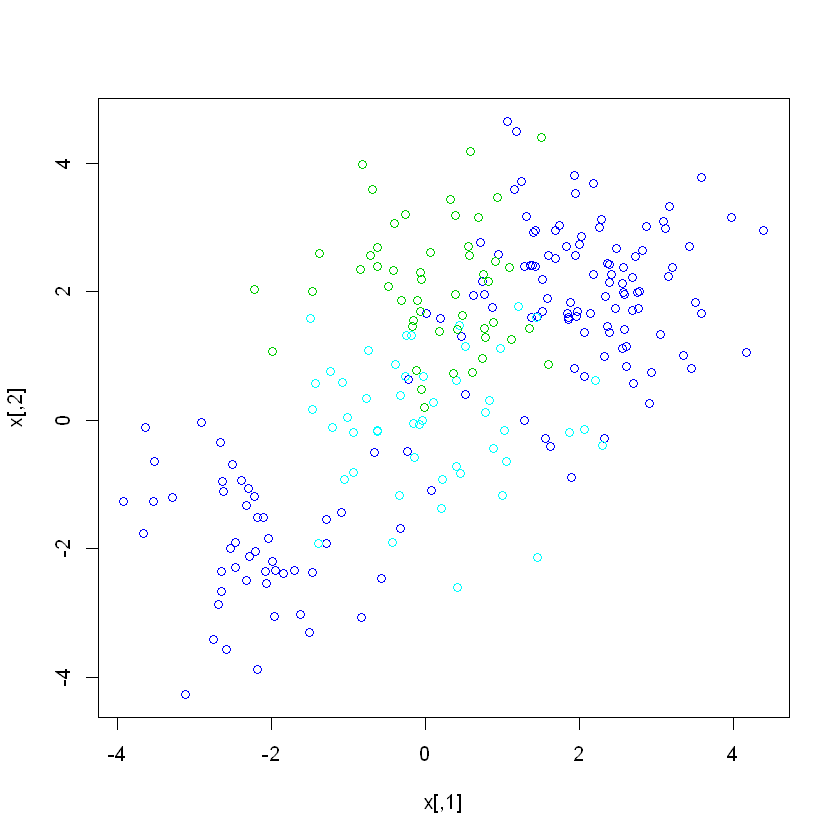

In [18]:
set.seed(1)
x=rbind(x,matrix(rnorm(50*2), ncol=2))
y=c(y,rep(0,50))
x[y==0,2]=x[y==0,2]+2
dat=data.frame(x=x,y=as.factor(y))
plot(x,col=(y+3))

## Model 11


Call:
svm(formula = y ~ ., data = dat, kernel = "radial", gamma = 1, cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  1 

Number of Support Vectors:  105

 ( 38 37 30 )


Number of Classes:  3 

Levels: 
 0 1 2




   y
      0   1   2
  0  42   8   6
  1   4 134   8
  2   4   8  36

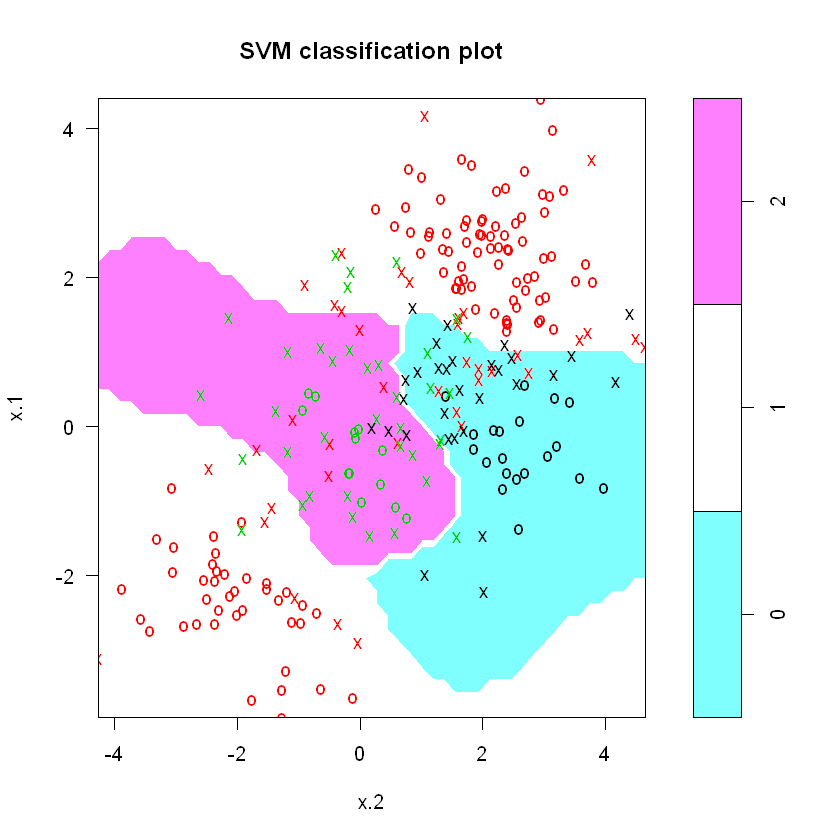

In [19]:
svmfit11 = svm(y~.,data=dat,kernel = "radial", gamma = 1, cost = 10)
plot(svmfit11,dat)
summary(svmfit11)
table(svmfit11$fitted, y)